## Simple Example Fetching Data Using Alpha Vantage API in Python

https://www.alphavantage.co/documentation/

## Get Imports

In [1]:
import os
import json
import requests
import pandas as pd
from urllib.request import urlopen
from dotenv import load_dotenv
load_dotenv()

True

## Load API Key

In [2]:
api_key = os.environ['API_KEY']

### Alpha Vantage API Default Urllib Library Example

In [13]:
# use an f-string for string formatting and including your credentials in the api url
api_url = url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey={api_key}'

with urlopen(url) as response:
    body = response.read()

# use json package to parse the HTTP response
data = json.loads(body)
# print the data that was retrieved to the screen
print(data)


{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2023-01-24 20:00:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2023-01-24 20:00:00': {'1. open': '141.4400', '2. high': '141.4400', '3. low': '141.4400', '4. close': '141.4400', '5. volume': '163'}, '2023-01-24 19:55:00': {'1. open': '141.0500', '2. high': '141.0500', '3. low': '141.0500', '4. close': '141.0500', '5. volume': '309'}, '2023-01-24 19:05:00': {'1. open': '141.2200', '2. high': '141.2200', '3. low': '141.2200', '4. close': '141.2200', '5. volume': '669'}, '2023-01-24 18:30:00': {'1. open': '141.5000', '2. high': '141.5000', '3. low': '141.4800', '4. close': '141.4800', '5. volume': '596'}, '2023-01-24 18:20:00': {'1. open': '141.5600', '2. high': '141.5600', '3. low': '141.4800', '4. close': '141.4800', '5. volume': '955'}, '2023-01-24 18:15:00': {'1. open': '141.8000', '2. h

### Alpha Vantage API Request Method Example

In [4]:
FUNCTION = "TIME_SERIES_INTRADAY"
SYMBOL = "IBM"
INTERVAL = "5min"

api_key = os.environ['API_KEY']
api_url = url = f'https://www.alphavantage.co/query?function={FUNCTION}&symbol={SYMBOL}&interval={INTERVAL}&apikey={api_key}'
response = requests.get(url)
data = response.json()
print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2023-01-24 20:00:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2023-01-24 20:00:00': {'1. open': '141.4400', '2. high': '141.4400', '3. low': '141.4400', '4. close': '141.4400', '5. volume': '163'}, '2023-01-24 19:55:00': {'1. open': '141.0500', '2. high': '141.0500', '3. low': '141.0500', '4. close': '141.0500', '5. volume': '309'}, '2023-01-24 19:05:00': {'1. open': '141.2200', '2. high': '141.2200', '3. low': '141.2200', '4. close': '141.2200', '5. volume': '669'}, '2023-01-24 18:30:00': {'1. open': '141.5000', '2. high': '141.5000', '3. low': '141.4800', '4. close': '141.4800', '5. volume': '596'}, '2023-01-24 18:20:00': {'1. open': '141.5600', '2. high': '141.5600', '3. low': '141.4800', '4. close': '141.4800', '5. volume': '955'}, '2023-01-24 18:15:00': {'1. open': '141.8000', '2. h

## Alpha Vantage API Python Library Example

In [5]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=api_key)
ts

In [6]:
data, metadata = ts.get_intraday("IBM")
print(metadata)

df = pd.DataFrame(data)
df.T.head()

{'1. Information': 'Intraday (15min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2023-01-24 20:00:00', '4. Interval': '15min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}


,1. open,2. high,3. low,4. close,5. volume
2023-01-24 20:00:00,141.0500,141.4400,141.0500,141.4400,472
2023-01-24 19:15:00,141.2200,141.2200,141.2200,141.2200,669
2023-01-24 18:30:00,141.5600,141.5600,141.4800,141.4800,1551
2023-01-24 18:15:00,141.8000,141.8000,141.8000,141.8000,100
2023-01-24 18:00:00,141.8000,141.8000,141.8000,141.8000,721


In [7]:
ts = TimeSeries(key=api_key, output_format='CSV')
data_csv, _ = ts.get_intraday("IBM")
for index, row in enumerate(data_csv):
        print(', '.join(row))
        if index > 5:
            break

timestamp, open, high, low, close, volume
2023-01-24 20:00:00, 141.0500, 141.4400, 141.0500, 141.4400, 472
2023-01-24 19:15:00, 141.2200, 141.2200, 141.2200, 141.2200, 669
2023-01-24 18:30:00, 141.5600, 141.5600, 141.4800, 141.4800, 1551
2023-01-24 18:15:00, 141.8000, 141.8000, 141.8000, 141.8000, 100
2023-01-24 18:00:00, 141.8000, 141.8000, 141.8000, 141.8000, 721
2023-01-24 17:45:00, 141.8000, 142.0000, 141.8000, 142.0000, 466


## Alpha Vantage API Endpoints

1. Core Stock APIs
2. Alpha Intelligence Endpoint
3. Fundamental Data Endpoint
4. Forex Endpoint
5. Cryptocurrencies Endpoint
6. Technical Indicators Endpoint
7. Economic Indicators Endpoint
8. Sector Performance Endpoint

## Alpha Vantage Core Stock APIs Endpoints

### Getting Intraday Trading Data

In [8]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='IBM',interval='15min', outputsize='full')
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-01-24 20:00:00,141.05,141.44,141.05,141.44,472.0
2023-01-24 19:15:00,141.22,141.22,141.22,141.22,669.0
2023-01-24 18:30:00,141.56,141.56,141.48,141.48,1551.0
2023-01-24 18:15:00,141.80,141.80,141.80,141.80,100.0
2023-01-24 18:00:00,141.80,141.80,141.80,141.80,721.0
...,...,...,...,...,...
2022-12-13 08:45:00,150.00,151.21,149.21,151.00,216225.0
2022-12-13 08:30:00,149.90,149.90,149.90,149.90,316.0
2022-12-13 08:15:00,149.40,149.84,149.40,149.80,736.0


<AxesSubplot: xlabel='date'>

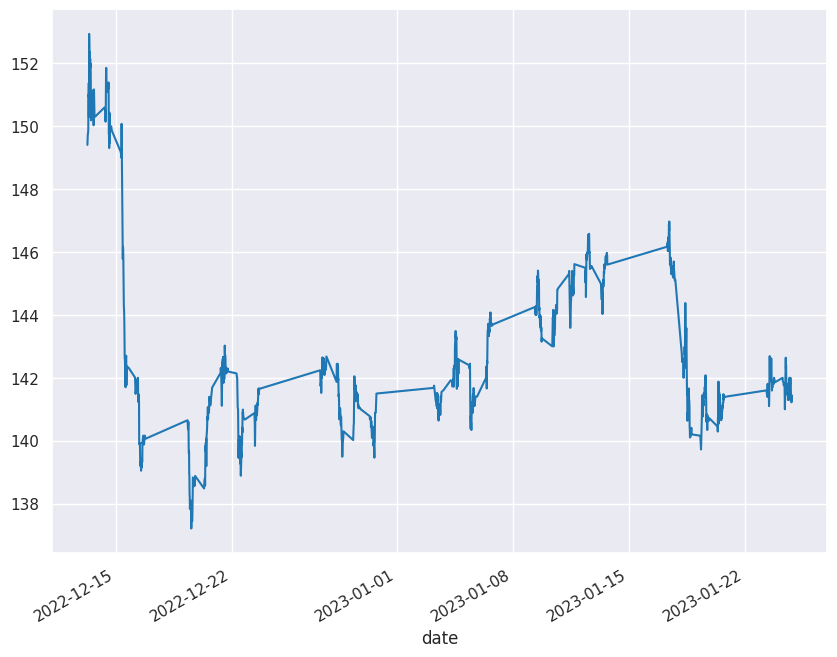

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")
data.describe()
data['4. close'].plot(figsize=(10,8))


### Get Daily Time Series Data 

In [11]:
data, meta_data = ts.get_daily(symbol='IBM')
data.head()

ValueError: Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints

In [ ]:
data, meta_data = ts.get_daily_adjusted(symbol='IBM')
data.head()

### Get Weekly Time Serie Data 

In [ ]:
data, meta_data = ts.get_weekly(symbol='IBM')
data.head()

In [ ]:
data, meta_data = ts.get_weekly_adjusted(symbol='IBM')
data.head()

### Get Monthly Time Serie Data 

In [ ]:
data, meta_data = ts.get_monthly(symbol='IBM')
data.head()

### Get Latest Quotes with Alpha Vantage

In [ ]:
data, meta_data = ts.get_quote_endpoint(symbol='IBM')
data.head()

### Search Symbols Information with Alpha Vantage

In [ ]:
data, meta_data = ts.get_symbol_search('BA')
data.head()

## Alpha Vantage Alpha Intelligence Endpoint

### Get Stock News and Sentiments with Alpha Vantage

In [ ]:
function = "NEWS_SENTIMENT"
tickers = "IBM"
topics = "technology"
url = "https://www.alphavantage.co/query?function=" +function+"&tickers="+tickers+"&topics="+topics+"&apikey="+api_key
r = requests.get(url)
data = r.json()
pd.DataFrame(data['feed']).head(3)


In [ ]:
i = 0
print(df['title'].iloc[i])
print(df['summary'].iloc[i])
print(df['overall_sentiment_score'].iloc[i])
print(df['overall_sentiment_label'].iloc[i])

## Alpha Vantage Fundamental Data Endpoint

### Get Company Overview with Alpha Vantage

In [ ]:
from alpha_vantage.fundamentaldata import FundamentalData
fd = FundamentalData(key=api_key)
data = fd.get_company_overview('IBM')
data

### Get Company Annual Earnings

In [ ]:
function = "EARNINGS"
symbol = "IBM"
url = "https://www.alphavantage.co/query?function="+ function +"&symbol="+symbol+"&apikey="+api_key
r = requests.get(url)
data = r.json()
data

### Get A List of All Stocks 

In [ ]:
CSV_URL = 'https://www.alphavantage.co/query?function=LISTING_STATUS&apikey='+api_key
df = pd.read_csv(CSV_URL)
df.head(10)

## Alpha Vantage Forex Endpoint

### Get Forex Exchange Rates with Alpha Vantage

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange
fe = ForeignExchange(key=api_key)
data = fe.get_currency_exchange_rate('EUR', 'USD')
data

### Get Historical Exchange Rates with Alpha Vantage

In [ ]:
fe = ForeignExchange(key=api_key, output_format='pandas')
data, meta_data = fe.get_currency_exchange_daily('EUR', 'USD', outputsize='compact')
data.head()

## Alpha Vantage Cryptocurrencies Endpoint

### Get Cryptocurrencies Exchange Rates with Alpha Vantage

In [ ]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
cc = CryptoCurrencies(key=api_key)
data = cc.get_digital_currency_exchange_rate('BTC', 'USD')
data

### Get Historical Cryptocurrencies Data with Alpha Vantage

In [ ]:
cc = CryptoCurrencies(key=api_key, output_format = 'pandas')
data, meta_data = cc.get_digital_currency_daily('BTC', 'CNY')
data.head()

In [ ]:
data, meta_data = cc.get_digital_currency_monthly('BTC', 'CNY')
data.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("poster")

data['4b. close (USD)'].plot(figsize=(10,8))

## Alpha Vantage Technical Indicators Endpoint

### Get Weighted Moving Average with Alpha Vantage

In [ ]:
from alpha_vantage.techindicators import TechIndicators
ti = TechIndicators(key=api_key, output_format = 'pandas')
data, meta_data = ti.get_wma(symbol='AAPL', interval='60min', time_period=60)
data.head(10)

### Plot Kaufman Adaptive Moving Average (KAMA) with Alpha Vantage

In [ ]:
sns.set_style("darkgrid")
sns.set_context("poster")
data, meta_data = ti.get_kama(symbol='AAPL', interval='daily', time_period=60)
data.plot(figsize=(10,8))
plt.title('KAMA indicator for  AAPL stock (Daily)')
plt.show()

## Alpha Vantage Economic Indicators Endpoint

### Get Yearly USA Inflation Rates with Alpha Vantage

In [ ]:
function = "INFLATION"
url = "https://www.alphavantage.co/query?function="+ function +"&apikey="+ api_key
r = requests.get(url)
data = r.json()

pd.DataFrame(data['data']).head(10)

### Get Monthly Customer Sentiment Information with Alpha Vantage

In [ ]:
function = "CONSUMER_SENTIMENT"
url = "https://www.alphavantage.co/query?function="+ function +"&apikey="+ api_key
r = requests.get(url)
data = r.json()
data
#pd.DataFrame(data['data']).head(10)

## Sector Performance Endpoint

In [ ]:
from alpha_vantage.sectorperformance import SectorPerformances
sp = SectorPerformances(key=api_key, output_format = 'pandas')
data, meta_data = sp.get_sector()
data